# Машинное обучение
## Лабораторная работа №1

Выполнил студент группы 15-В-2   
Соболев Д. А.   
Вариант №1

In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [272]:
df = pd.read_csv(r'titanic/train.csv')

In [273]:
df.shape

(891, 12)

In [274]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [275]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [276]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [278]:
df_reduced = df.dropna()
df_reduced = df_reduced.drop_duplicates()

In [279]:
df_reduced.shape

(183, 12)

In [280]:
df_reduced.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [281]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


### 1) Какое количество мужчин и женщин ехало на корабле? 


будем считать людей, чей возраст больше или равен 18, т.е. детей не учитываем.

In [282]:
adult_number = len(df[df["Age"] >= 18])
print(adult_number)

601


### 2) Какой части пассажиров удалось выжить? Посчитайте долю выживших пассажиров. 

In [283]:
share_of_survived = df["Survived"].mean()
print(share_of_survived)

0.3838383838383838


### 3) Какую долю пассажиры первого класса составляли среди всех пассажиров? 

In [284]:
share_first_class = (df["Pclass"] == 1).mean()
print(share_first_class)

0.242424242424


### 4) Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 

In [285]:
mean_age = df["Age"].mean()
median_age = df["Age"].median()
print("Mean age: ", mean_age)
print("Median age:", median_age)

Mean age:  29.69911764705882
Median age: 28.0


### 5) Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch.

In [286]:
correlation =  df["SibSp"].corr(df["Parch"])
print(correlation)

0.41483769862


Это значение говорит о том, что между числом братьев/сестер и числом родителей/детей **есть зависимость(положительная), но она слабо выражена.**

### 6) Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

Записи полных имен имеют 2 вида:   
1) если женщина за мужем, то для нее указано 'Mrs.' и ее имя находится в первым в круглых скобках    
2) если женщина не за мужем, то для нее указано 'Miss.' и ее имя находится сразу за 'Miss.'       

Поэтому в записях стоит убрать все символы до первой точки.   
А если есть круглые скобки, то до первой скобки включительно.

После этих операций имя будет первым словом.

In [287]:
# Выберем из таблицы только строки с женскими именами и создадим последовательность из столбца 'Name'.
# Будем работать с этой последовательностью.
female_names = (df[df["Sex"] == "female"])["Name"].reset_index(drop=True)

#дробим строку по запятой, выкидываем строчку, идущую до нее
#дробим строку по точке, выкидываем строчку, идущую до нее
female_names = female_names.apply(lambda x: x.split(',')[1].split('.')[1])

#теперь тоже самое, только по открывающей скобке, если она есть
for i, name in enumerate(female_names):
    if name.find("(") != -1:
        female_names[i] = name.split("(")[1]

#а сейчас вытаскиваем первое слово
female_names = female_names.apply(lambda x: x.strip(' ').split(' ')[0])

#список по частотам
names_rate_list = female_names.value_counts()
#вывод самого встречаемого
print(names_rate_list.idxmax(), ": ", names_rate_list.max())

Anna :  14


### 7) Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [288]:
class_correlation = df['Pclass'].corr(df["Survived"])
print(class_correlation)

-0.338481035961


Если использовать коэффициент Пирсона, то наблюдается отрицательная корреляция. То есть увеличение цифры класса (а чем она выше, тем класс беднее), влечет снижение выживаемости. Но корреляция слабая, поэтому большое количество денег у пассажира не являлось 100%-ым признаком его выживания или отсутствие - смерти.

### 8) Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

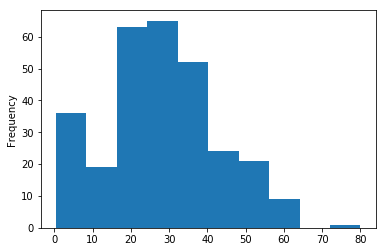

In [349]:
df_survived = df[df['Survived'] == True]
df_survived_ages = df_survived['Age']
df_survived_ages.plot.hist(stacked=True, bins=10)
plt.show()

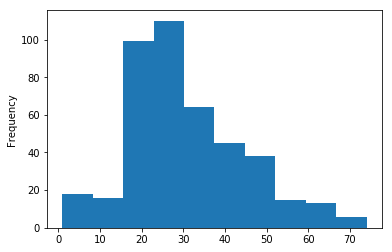

In [350]:
df_nsurvived = df[df['Survived'] == False]
df_nsurvived_ages = df_nsurvived['Age']
df_nsurvived_ages.plot.hist(stacked=True, bins=10)
plt.show()

Если наложить одну гистограмму на другую, то будет заметно, что доля спасенных детей заметно больше чем не спасенных. Иная зависимость относительно молодых и пожилых людей .

### 9) Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 


 ---   Class # 1    ---
not survived - blue
survived - orange


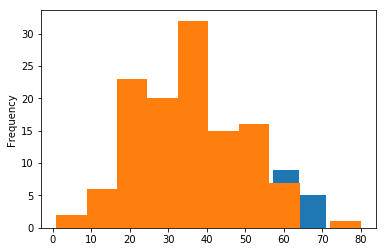


 ---   Class # 2    ---
not survived - blue
survived - orange


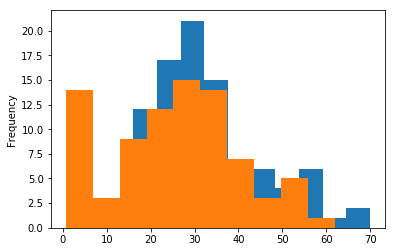


 ---   Class # 3    ---
not survived - blue
survived - orange


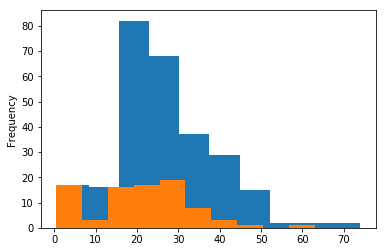

In [359]:
for cls in range(1, 4):
    print('\n ---   Class #', cls, '   ---')
    for surv in range(2):
        if surv == 0:
            print('not survived - blue')
        else:
            print('survived - orange')
            
        df_temp = df[df['Survived'] == surv]
        df_temp = df_temp[df_temp['Pclass'] == cls]
        df_temp = df_temp['Age']
        df_temp.plot.hist(stacked=True, bins=10)
    plt.show()

По графикам видно, что чем выше социальное положение человека, тем более вероятно его спасение.

### 10) Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

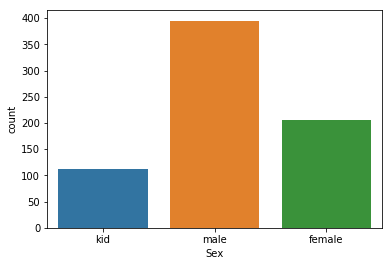

In [380]:
#разбиваем таблицу на две - взрослые и дети
df_children = df[df['Age'] < 18]
df_adult = df[df['Age'] >= 18]

#в таблице детей в качестве пола указываем - ребенок
df_children = df_children.replace(to_replace=['male', 'female'], value=['kid', 'kid'])
#и объединяем две таблицы
df_new = pd.concat([df_children, df_adult])

sns.countplot(x='Sex', data = df_new)
plt.show()